# Newton's method
by Author1, Author2, Author3, Author4

## Introduction / Problem Formulation
Newton's method is an algorithm to numerically approximate the roots of a real-valued function $f$:

1. Choose a starting point $x_0$ which is in proximity of the root of $f$.
2. The point $x_1$ is the intersection of the tangent of the graph $f$ at point $(x_0, f(x_0))$ with the x-axis, that is:  
\begin{align}
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)},
\end{align}  
where $f'(x)$ is the derivate of $f(x)$. The point $x_1$ is a better approximation of the root than $x_0$.
3. To find the root of $f(x)$ replace $x_0$ with the newly computed $x_1$ and repeat the following computation  
\begin{align}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},
\end{align}  
until a sufficiently precise value is reached for the root. This can be computed using the following formula:
\begin{align}
\vert x_{n+1} - x_n \vert < \epsilon,
\end{align}  
where $\epsilon$ defines the precision of your value, e.g. $\epsilon=0.001$ to approximate the root with a precision of up to 3 decimals.

In this work we want to approximate the roots of the function

\begin{align}
f \colon \mathbb{R} \rightarrow \mathbb{R} \colon \quad f(x) = \cos{(x)} - 0.8x
\end{align}

with derivative 

\begin{align}
f'(x) = -\sin{(x)} - 0.8
\end{align}  

and analyze whether the starting point influenes the number of iterations needed.

In [1]:
# import all necessary packages 
import numpy as np
import matplotlib.pyplot as plt

## Materials and Methods
### Definition of functions

In [2]:
# definition of function f
def f(x):
    """
    function to compute f(x) = cos(x) - 0.8x
    x: point 
    return: f(x)
    """
    return np.cos(x) - 0.8*x

# definition of derivative f'
def df(x):
    """
    function to compute the derivative f'(x) = -sin(x) - 0.8
    x: point 
    return: f'(x)
    """
    return -np.sin(x) - 0.8

### Imlementation of Newton's method

In [3]:
def newton(f, df, x0, epsilon=1e-6):
    """
    function to approximate zero using Newton's method
    f: real-valued function whose zeros we want to approximate
    df: derivative of f
    x0: starting point
    epsilon: precision
    return: number of iterations needed and approximated root
    """
    i = 1 #iteration counter
    diff = np.inf
    x1 = np.inf
    while diff > epsilon: #check if difference abs(x1-x0) > epsilon
        x1 = x0 - f(x0)/df(x0) # Compute new x1 value using tangent equation
        diff = np.abs(x1-x0) #Compute difference between old root and current root
        x0 = x1 #replace x0 with new root x1
        i += 1 #increase loop counter
    return i, x1 

### Data
We try out different starting points

In [4]:
starting_points = [0.2,0.4, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1, 1.2]

## Run experiments
We test Newton's method with the specified starting points

In [5]:
iterations = []
roots = []
# approximate root for each starting point
for point in starting_points:
    i, x = newton(f, df, point, epsilon=1e-6)
    iterations.append(i)
    roots.append(x)

## Results
We first compare the approximated roots and then visualize the number of iterations as a barplot

In [6]:
# compare roots
print('Starting point\t Root')
for i in range(len(starting_points)):
    print("%.1f\t\t %.6f" % (starting_points[i],roots[i]))

Starting point	 Root
0.2		 0.837061
0.4		 0.837061
0.6		 0.837061
0.7		 0.837061
0.8		 0.837061
0.8		 0.837061
0.8		 0.837061
0.9		 0.837061
1.0		 0.837061
1.2		 0.837061


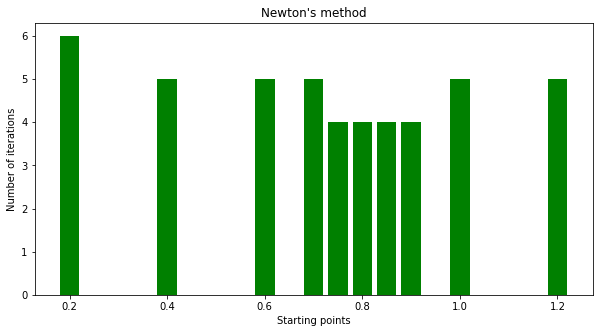

In [7]:
# visualize number of iterations as barplot
fig = plt.figure(figsize = (10, 5))
plt.bar(starting_points, iterations, color ='green', width = 0.04) 
plt.xlabel("Starting points")
plt.ylabel("Number of iterations")
plt.title("Newton's method")
plt.show()

## Interpretation
- Each starting point gives the same approximated root x=0.837061.
- From the barplot we can see that Newton's method needs less iterations the closer the starting point is to the root. 

## Future research
- use additional starting points closer to the true zero
- try out different precition values epsilon
- check out different functions $f$